# Neuralforecast (only on Colab)
NeuralForecast offers a large collection of neural forecasting models focused on their usability, and robustness. The models range from classic networks like MLP, RNNs to novel proven contributions like NBEATS, NHITS, TFT and other architectures.

## Features
Exogenous Variables: Static, historic and future exogenous support.
Forecast Interpretability: Plot trend, seasonality and exogenous NBEATS, NHITS, TFT, ESRNN prediction components.
Probabilistic Forecasting: Simple model adapters for quantile losses and parametric distributions.
Train and Evaluation Losses Scale-dependent, percentage and scale independent errors, and parametric likelihoods.
Automatic Model Selection Parallelized automatic hyperparameter tuning, that efficiently searches best validation configuration.
Simple Interface Unified SKLearn Interface for StatsForecast and MLForecast compatibility.
Model Collection: Out of the box implementation of MLP, LSTM, RNN, TCN, DilatedRNN, NBEATS, NHITS, ESRNN, Informer, TFT, PatchTST, VanillaTransformer, StemGNN and HINT. See the entire collection here.

In [5]:
!pip install tokenizers neuralforecast -U -q

## N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting):

Introduced in 2019, it's a deep neural architecture that uses backward and forward residual links
Key features:

Pure deep learning approach that requires no manual feature engineering or data preprocessing
Built using a stack of basic blocks that process the input iteratively
Each block produces two outputs: backcast (reconstruction of the input) and forecast
Known for being interpretable while maintaining high accuracy
Particularly effective for univariate time series forecasting

## NHITS (Neural Hierarchical Interpolation for Time Series):

A more recent evolution that builds on N-BEATS' architecture
Key improvements:

Better handles multiple sampling rates and frequencies in the data
Uses interpolation instead of basis expansion
More efficient at processing multivariate time series
Generally shows improved performance on irregular or hierarchical time series
Better suited for handling missing values and varying forecast horizons



### Both models are notable for:

- Being end-to-end trainable neural networks
- Not requiring extensive domain expertise to implement
- Achieving competitive results compared to traditional statistical methods
- Being particularly useful for economic and financial time series forecasting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()

Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
final_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
final_df

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
900       Non-trainable params
2.4 M     Total params
9.789     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.751     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,y,index,NBEATS,NHITS
ds,,,,,
1949-01-31,1.0,112.0,NaN,NaN,NaN
1949-02-28,1.0,118.0,NaN,NaN,NaN
1949-03-31,1.0,132.0,NaN,NaN,NaN
1949-04-30,1.0,129.0,NaN,NaN,NaN
1949-05-31,1.0,121.0,NaN,NaN,NaN
...,...,...,...,...,...
1960-08-31,1.0,606.0,7.0,628.041992,606.797546
1960-09-30,1.0,508.0,8.0,556.612915,555.142212
1960-10-31,1.0,461.0,9.0,481.607025,521.882690


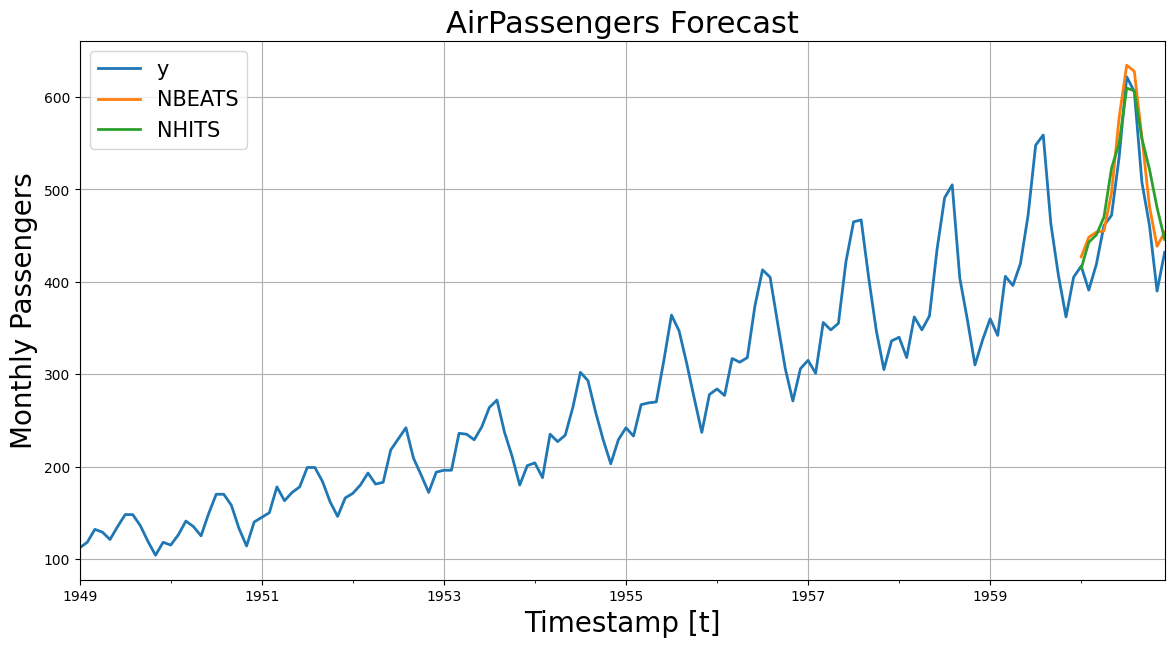

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (14, 7))
final_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()